In [21]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv("TIMES_WorldUniversityRankings_2024.csv")

In [23]:
print(data.head())


  rank                                   name  scores_overall  \
0    1                   University of Oxford             0.0   
1    2                    Stanford University             1.0   
2    3  Massachusetts Institute of Technology             2.0   
3    4                     Harvard University             3.0   
4    5                University of Cambridge             4.0   

   scores_overall_rank  scores_teaching  scores_teaching_rank  \
0                   10             96.6                     5   
1                   20             99.0                     1   
2                   30             98.6                     2   
3                   40             97.7                     3   
4                   50             95.8                     7   

   scores_research  scores_research_rank  scores_citations  \
0            100.0                     2              99.0   
1             97.8                     8              99.6   
2             96.2              

In [24]:
print(data.describe())


       scores_overall  scores_overall_rank  scores_teaching  \
count     2673.000000         2.673000e+03      2673.000000   
mean       104.810700         2.945872e+05        29.060662   
std         70.795919         4.486570e+05        11.787197   
min         -1.000000         1.000000e+01         9.400000   
25%         -1.000000         6.690000e+03        21.900000   
50%        153.000000         1.337000e+04        29.060662   
75%        157.000000         1.000101e+06        30.400000   
max        158.000000         1.000769e+06        99.000000   

       scores_teaching_rank  scores_research  scores_research_rank  \
count           2673.000000      2673.000000           2673.000000   
mean             678.473625        23.416176            678.473625   
std              633.450078        14.091708            633.450078   
min                0.000000         4.600000              0.000000   
25%                0.000000        13.600000              0.000000   
50%         

In [25]:
print(data.isnull().sum())


rank                                    0
name                                    0
scores_overall                          0
scores_overall_rank                     0
scores_teaching                         0
scores_teaching_rank                    0
scores_research                         0
scores_research_rank                    0
scores_citations                        0
scores_citations_rank                   0
scores_industry_income                769
scores_industry_income_rank             0
scores_international_outlook          769
scores_international_outlook_rank       0
record_type                             0
member_level                            0
url                                     0
nid                                     0
location                                0
stats_number_students                   0
stats_student_staff_ratio               0
stats_pc_intl_students                  0
stats_female_male_ratio                93
aliases                           

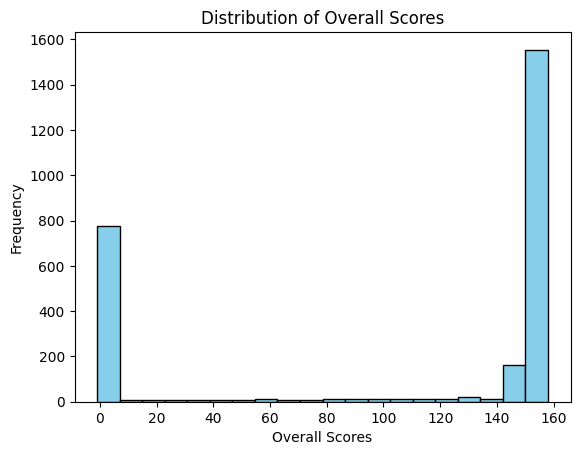

In [26]:
plt.hist(data['scores_overall'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Overall Scores')
plt.xlabel('Overall Scores')
plt.ylabel('Frequency')
plt.show()

In [4]:
selected_columns = ['scores_overall', 'scores_teaching', 'scores_research', 'scores_citations', 
                    'stats_number_students', 'stats_student_staff_ratio', 'stats_pc_intl_students']


In [6]:
for column in selected_columns:
    # Check if the column contains string values
    if data[column].dtype == 'object':
        # Convert string values to numerical values using pandas factorize() function
        data[column] = pd.factorize(data[column])[0]

In [17]:
imputer = SimpleImputer(strategy='mean')
data[selected_columns] = imputer.fit_transform(data[selected_columns])

In [18]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[selected_columns])


In [19]:
similarity_matrix = cosine_similarity(scaled_data)


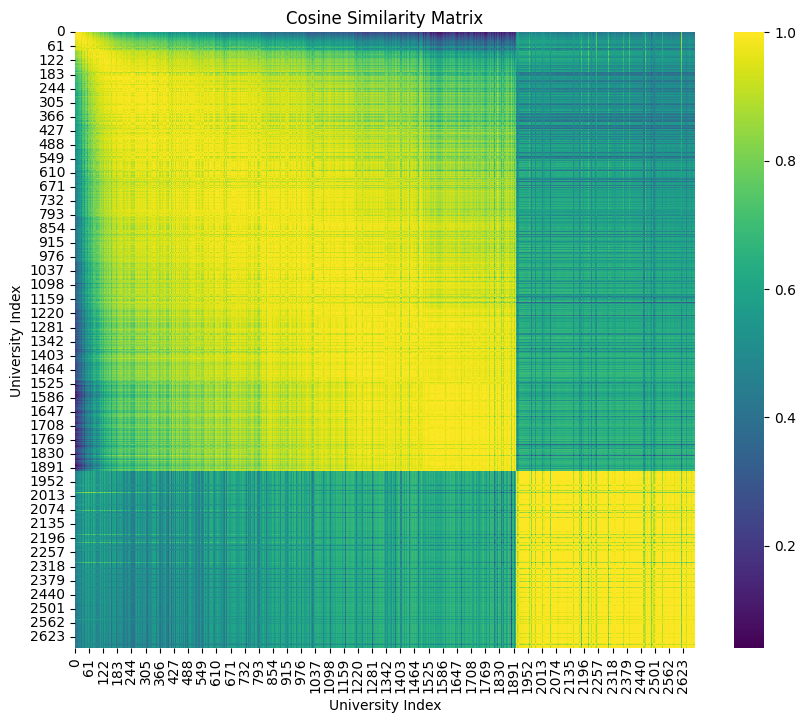

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap='viridis')
plt.title('Cosine Similarity Matrix')
plt.xlabel('University Index')
plt.ylabel('University Index')
plt.show()

In [20]:
recommended_universities = recommend_universities("Princeton University", similarity_matrix)
print(recommended_universities)

3                       Harvard University
6       California Institute of Technology
1                      Stanford University
2    Massachusetts Institute of Technology
0                     University of Oxford
Name: name, dtype: object
